findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

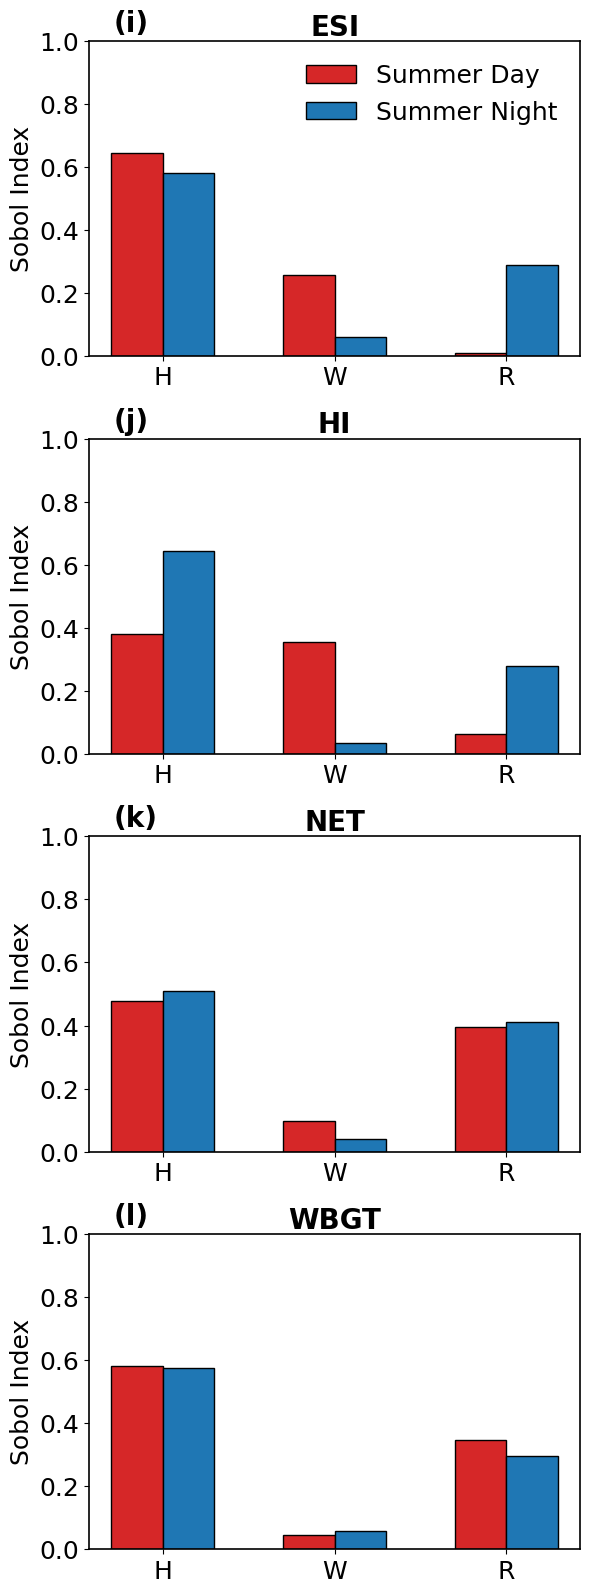

Saved /project2/zhan248_1326/hhao4018/UQ_analysis/sobol_HSI_Figures_v4/Sobol_HSI_4x1_summer_firstorder_only.png


<Figure size 640x480 with 0 Axes>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.linewidth": 1.2,
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
})

summer_file = "/project2/zhan248_1326/hhao4018/UQ_analysis/PCE_HSI_Urban_NonCity_Results_v4/summer/PCE_stats_summer.csv"
df_summer = pd.read_csv(summer_file)

var_col = df_summer.columns[0]
sobol_labels  = ["H", "W", "R"]                      
sobol_csvcols = ["sobol_H", "sobol_W", "sobol_R"]   

color_map = {
    ("Summer", "Day"):   "#d62728",
    ("Summer", "Night"): "#1f77b4",
}

base_vars = ["ESI", "HI", "NET", "WBGT"]
unit_official_names = {
    "ESI": "ESI",
    "ETm": "ETm",
    "HI":  "HI",
    "NET": "NET",
    "WBGT": "WBGT"
}

fig, axes = plt.subplots(4, 1, figsize=(6, 16), sharex=False)
axes = axes.flatten()

width = 0.3
x = np.arange(len(sobol_labels))  
offsets = [-0.5 * width, 0.5 * width]
label_order = [("Summer", "day"), ("Summer", "night")]

for idx, base_var in enumerate(base_vars):
    ax = axes[idx]

    for i, (season, period) in enumerate(label_order):
        var_name = f"{base_var}_{period.capitalize()}_city"
        row = df_summer[df_summer[var_col] == var_name]
        if row.empty:
            continue

        vals = row[sobol_csvcols].iloc[0].astype(float).values
        color = color_map[(season, period.capitalize())]
        label = f"{season} {period.capitalize()}"

        ax.bar(
            x + offsets[i],
            vals,
            width=width,
            color=color,
            label=label,
            edgecolor='black'
        )

    ax.set_xticks(x)
    ax.set_xticklabels(sobol_labels)
    ax.set_ylabel("Sobol Index")
    ax.set_ylim(0, 1)
    ax.set_title(unit_official_names[base_var], fontsize=20, pad=2, fontweight='bold')

    if idx == 0:
        ax.legend(loc='upper right', framealpha=0)

    ax.text(
        0.05, 1.1,
        f"({chr(105 + idx)})",
        transform=ax.transAxes,
        fontsize=20, fontweight='bold', va='top'
    )

plt.tight_layout(h_pad=1.5)
outdir = "/project2/zhan248_1326/hhao4018/UQ_analysis/sobol_HSI_Figures_v4"
os.makedirs(outdir, exist_ok=True)

plt.show()
outpath = os.path.join(outdir, "Sobol_HSI_4x1_summer_firstorder_only.png")
plt.savefig(outpath, dpi=600)
plt.close(fig)
print("Saved", outpath)
